In [27]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [28]:
bank=pd.read_csv('bank-full.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [29]:
bank.shape

(45211, 17)

In [30]:
bank["y"].value_counts()#data is not balanced

no     39922
yes     5289
Name: y, dtype: int64

In [31]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [32]:
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

# One Hot Encoding

In [56]:
bank1 = pd.get_dummies(bank, columns = ['job','marital','education','contact','month','poutcome'])
bank1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [57]:
import numpy as np
bank1['default']=np.where(bank['default'].str.contains('yes'),1,0)
bank1['housing']=np.where(bank['housing'].str.contains('yes'),1,0)
bank1['loan']=np.where(bank['loan'].str.contains('yes'),1,0)
bank1['y']=np.where(bank['y'].str.contains('yes'),1,0)

In [58]:
bank1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [59]:
bank1.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

# Normalising the data

In [60]:
X=bank1.iloc[:,0:49]
Y=bank1.iloc[:,10]
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
X

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.0,0.092259,1.0,0.0,0.133333,0.053070,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.0,0.073067,1.0,0.0,0.133333,0.030704,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,0.0,0.072822,1.0,1.0,0.133333,0.015453,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.376623,0.0,0.086476,1.0,0.0,0.133333,0.018707,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.194805,0.0,0.072812,0.0,0.0,0.133333,0.040260,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.0,0.080293,0.0,0.0,0.533333,0.198658,0.032258,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,0.688312,0.0,0.088501,0.0,0.0,0.533333,0.092721,0.016129,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,0.701299,0.0,0.124689,0.0,0.0,0.533333,0.229158,0.064516,0.212156,0.010909,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,0.506494,0.0,0.078868,0.0,0.0,0.533333,0.103294,0.048387,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
X.shape

(45211, 49)

In [62]:
Z=X.drop(['y'],axis=1)
Z

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.0,0.092259,1.0,0.0,0.133333,0.053070,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.0,0.073067,1.0,0.0,0.133333,0.030704,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,0.0,0.072822,1.0,1.0,0.133333,0.015453,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.376623,0.0,0.086476,1.0,0.0,0.133333,0.018707,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.194805,0.0,0.072812,0.0,0.0,0.133333,0.040260,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.0,0.080293,0.0,0.0,0.533333,0.198658,0.032258,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,0.688312,0.0,0.088501,0.0,0.0,0.533333,0.092721,0.016129,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,0.701299,0.0,0.124689,0.0,0.0,0.533333,0.229158,0.064516,0.212156,0.010909,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,0.506494,0.0,0.078868,0.0,0.0,0.533333,0.103294,0.048387,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [63]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [64]:
#Logistic regression and fit the model
model=LogisticRegression()
model.fit(Z,Y)


LogisticRegression()

In [65]:
model.intercept_

array([-2.07296978])

In [66]:
model.coef_.round(3)

array([[ 1.5000e-02, -3.1000e-02,  1.1310e+00, -6.5500e-01, -4.1700e-01,
         2.4500e-01,  1.8753e+01, -4.0010e+00, -8.2000e-02,  9.4400e-01,
         1.1300e-01, -1.7600e-01, -2.2200e-01, -3.5800e-01, -3.8000e-02,
         3.8300e-01, -1.6100e-01, -9.8000e-02,  4.9000e-01, -5.2000e-02,
        -3.4000e-02, -1.7200e-01, -8.0000e-02, -2.5900e-01,  1.3000e-02,
        -2.7900e-01, -1.0100e-01,  9.1000e-02, -3.5000e-02,  4.7500e-01,
         2.9000e-01, -1.0900e+00, -3.0000e-02, -7.5900e-01,  6.0900e-01,
        -2.1400e-01, -1.2360e+00, -8.5200e-01,  3.7100e-01,  1.4790e+00,
        -4.3800e-01, -8.8300e-01,  8.2700e-01,  8.0100e-01, -6.7300e-01,
        -4.6500e-01,  1.5880e+00, -7.7600e-01]])

In [67]:
#Predict for X dataset.
y_pred=model.predict(Z)

In [68]:
y_pred_df=pd.DataFrame({'actual':Y,'predicted_values':model.predict(Z)})

In [69]:
y_pred_df

,actual,predicted_values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [70]:
#Confusion matrix for model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[39017   905]
 [ 3539  1750]]


In [71]:
ac(Y,y_pred)

0.9017053371966999

In [72]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.66      0.33      0.44      5289

    accuracy                           0.90     45211
   macro avg       0.79      0.65      0.69     45211
weighted avg       0.89      0.90      0.89     45211



# ROC Curve

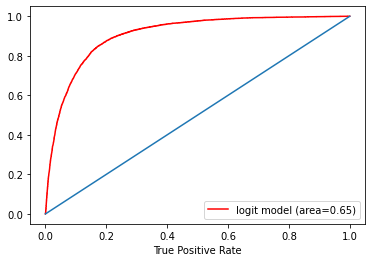

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(Y,model.predict_proba(Z)[:,1])
auc=roc_auc_score(Y,y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color="red",label="logit model (area=%0.2f)"%auc)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.xlabel('True Positive Rate')
plt.legend(loc="best")
plt.show()

In [74]:
pd.DataFrame({"tpr":tpr,"fpr":fpr,"threshold":thresholds})

,tpr,fpr,threshold
0,0.000000,0.000000,2.000000
1,0.000000,0.000025,1.000000
2,0.000189,0.000025,0.999981
3,0.000189,0.000075,0.999948
4,0.000567,0.000075,0.999919
...,...,...,...
6171,0.999622,0.985872,0.004753
6172,0.999811,0.985872,0.004752
6173,0.999811,0.993688,0.003587
6174,1.000000,0.993688,0.003585


In [75]:
auc

0.6541030984138108